In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 2: Read the dataset
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# Step 3: Drop categorical columns
data_numeric = data.drop(['Channel', 'Region'], axis=1)

# Step 4: Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

# Step 5: Apply KMeans with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
data['Cluster_k3'] = kmeans_3.fit_predict(scaled_data)

# View cluster centers
print("Cluster Centers for k=3:")
pd.DataFrame(kmeans_3.cluster_centers_, columns=data_numeric.columns)


Cluster Centers for k=3:


C:\Users\bhagw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_k3
0,-0.242604,-0.212661,-0.221572,-0.186569,-0.203234,-0.150077,-0.472282
1,-0.260860,1.999209,2.371905,-0.234950,2.493966,0.331741,2.800224
2,1.784209,0.008694,-0.192645,1.396080,-0.398960,0.759479,1.163971


C:\Users\bhagw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\bhagw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\bhagw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\bhagw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

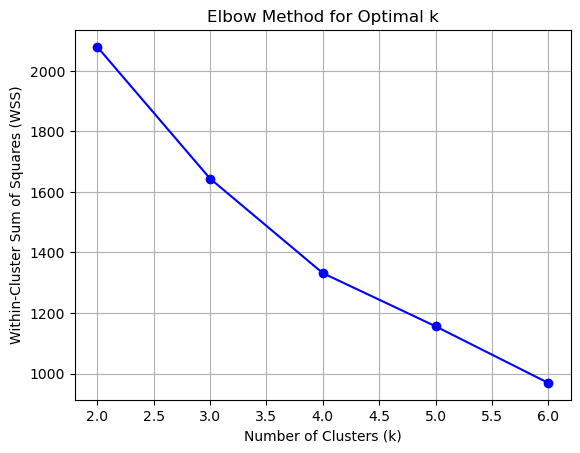

In [9]:
# Step 6: Elbow Method to find optimal k
wss = []
K_range = range(2, 7)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    wss.append(km.inertia_)

# Plot Elbow Curve
plt.plot(K_range, wss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [11]:
# Step 7: Try k=4 (or the value where the elbow occurs)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
data['Cluster_k4'] = kmeans_4.fit_predict(scaled_data)

# View new cluster centers
print("Cluster Centers for k=4:")
pd.DataFrame(kmeans_4.cluster_centers_, columns=data_numeric.columns)


Cluster Centers for k=4:


C:\Users\bhagw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_k3
0,-0.242604,-0.212661,-0.221572,-0.186569,-0.203234,-0.150077,-0.472282
1,-0.260860,1.999209,2.371905,-0.234950,2.493966,0.331741,2.800224
2,1.780697,-0.090668,-0.221104,1.290223,-0.395962,0.457191,1.163971
3,1.966817,5.175503,1.287217,6.900600,-0.554862,16.478447,1.163971


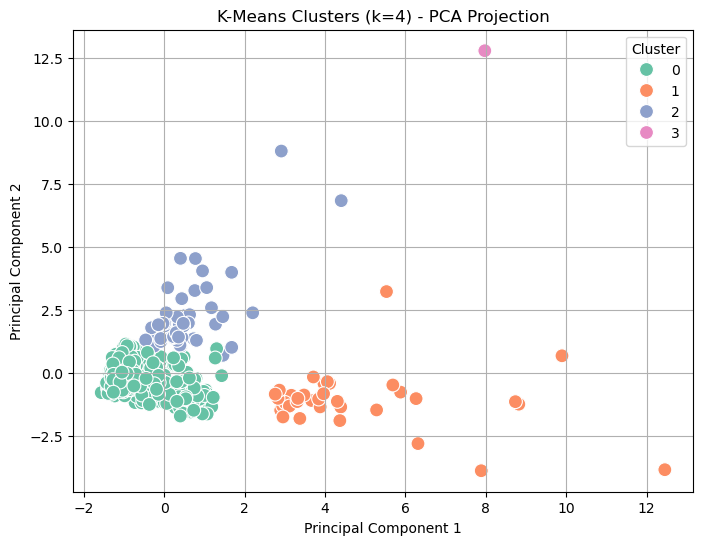

In [13]:
# Step 8: Visualize Clusters using PCA (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster_k4']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('K-Means Clusters (k=4) - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# 4.	Write a brief report to explain each of the findings [10 points]. 

We applied k-means clustering to segment wholesale customers based on annual spending across six product categories, excluding Channel and Region for cleaner analysis. After standardizing the data, the elbow method suggested four clusters as optimal. Cluster 0 included low spenders, likely small businesses or occasional buyers. Cluster 1 showed high spending on Grocery, Milk, and Detergents_Paper, suggesting retail-focused customers. Cluster 2 focused on Fresh and Frozen products, indicating food-related businesses like restaurants. Cluster 3 had balanced high spending across most categories, likely large or premium buyers. These clusters reveal distinct customer profiles that can help tailor marketing and sales strategies.

